# San Francisco vs Los Angeles Housing Prices

## Introduction:
California, known for its dynamic and often challenging housing market, is a state where real estate prices are influenced by multiple factors such as economic trends, demographic shifts, and geographic constraints. Within this diverse market, Los Angeles and San Francisco stand out as two of the most prominent cities, each with its unique characteristics in the housing sector. This study aims to delve into these differences, particularly focusing on the disparity in average housing prices between these cities over time, starting from a historical perspective in 1990. To answer this, we will analyze housing market data from both cities, looking specifically at two key statistical measures:

Mean Housing Prices (Location Parameter): The mean provides a central value for the distribution of housing prices. It offers a representative measure of the typical house price in each city, capturing the central tendency of the housing market. This measure is especially relevant in real estate analysis, as it helps in understanding the general level of affordability and market trends in different urban areas.

Inter-Quartile Range (IQR) of Housing Prices (Scale Parameter): The IQR is selected as the scale parameter. This measure effectively captures the spread of housing prices within each market, offering insights into the diversity of the housing stock and the degree of inequality in housing affordability. The IQR is particularly useful in real estate market analysis as it provides a clearer picture of the housing price distribution, highlighting areas with either a wide or narrow range of housing prices.

By comparing these parameters across San Francisco and Los Angeles, we aim to provide a comprehensive view of the housing market landscape in these two prominent California cities. This comparison will not only aid potential homebuyers and investors in making informed decisions but also offer policymakers valuable insights into regional housing market dynamics.

The dataset for this analysis includes housing prices, property features, and location-specific variables, supplemented with broader economic indicators, trends in the housing market, and demographic data. Theories and models from prominent studies such as *Glaeser & Gyourko (2018)* and *Hipp & Singh (2014)* will support our understanding of the intricate relationship between housing markets and urban development, particularly in the context of California's diverse and complex economic landscape.


## Methods and Results:
To process our data set properly we'll need to load the necessary libraries and then load the .csv file into the notebook

In [1]:
# Load libraries that are necessary for data processing
library(repr)
library(tidyverse)
library(broom)
library(repr)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load dataset into notebook and display first 6-rows of ca_homes
ca_homes <- read_csv("data/California_Houses.csv")
head(ca_homes)

Rows: 20640 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Median_House_Value, Median_Income, Median_Age, Tot_Rooms, Tot_Bedr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Median_House_Value Median_Income Median_Age Tot_Rooms Tot_Bedrooms Population
1 452600             8.3252        41          880       129          322      
2 358500             8.3014        21         7099      1106         2401      
3 352100             7.2574        52         1467       190          496      
4 341300             5.6431        52         1274       235          558      
5 342200             3.8462        52         1627       280          565      
6 269700             4.0368        52          919       213          413      
  Households Latitude Longitude Distance_to_coast Distance_to_LA
1  126       37.88    -122.23    9263.041         556529.2      
2 1138       37.86    -122.22   10225.733         554279.9      
3  177       37.85    -122.24    8259.085         554610.7      
4  219       37.85    -122.25    7768.087         555194.3      
5  259       37.85    -122.25    7768.087         555194.3      
6  193       37.85    -122.25    7768.087         555194.3      
  Distance_to_SanDiego Distance_to_SanJose Distance_to_SanFrancisco
1 735501.8             67432.52            21250.21                
2 733236.9             65049.91            20880.60                
3 733525.7             64867.29            18811.49                
4 734095.3             65287.14            18031.05                
5 734095.3             65287.14            18031.05                
6 734095.3             65287.14            18031.05

We can then filter the original data set into smaller sample sets for further processing and manipulation. We'll start by filtering the two cities based on the approximate longitudinal and latitudinal boundaries.

In [3]:
# Filter lA homes from dataset based on Latitude boundaries
la_homes <- ca_homes %>%
    filter(Latitude > 33.924 & Latitude < 34.202)

# Further filter LA homes from la_homes sample based on Longitude boundaries
la_homes <- la_homes %>%
    filter(Longitude < -118.131 & Longitude > -118.549)

# Select variables that are of interest to sample
la_homes <- la_homes %>%
    select(Median_House_Value, Median_Income, Tot_Rooms, Tot_Bedrooms, Latitude, Longitude, Distance_to_LA)

# Display first 6-rows of la_homes sample
head(la_homes)

Median_House_Value Median_Income Tot_Rooms Tot_Bedrooms Latitude Longitude
1 187500             1.0000         161        48         34.20    -118.42  
2 181700             3.0125        4138      1171         34.20    -118.38  
3 177200             2.0348        2594      1028         34.20    -118.39  
4 171800             2.9861        2199       609         34.20    -118.37  
5 170400             2.8917        1438       309         34.20    -118.37  
6 176400             4.1445        2921       685         34.19    -118.36  
  Distance_to_LA
1 23094.74      
2 20673.95      
3 21245.21      
4 20128.58      
5 20128.58      
6 18689.88

In [4]:
# Filter SF homes from dataset based on Latitude boundaries
sf_homes <- ca_homes %>%
    filter(Latitude > 37.71 & Latitude < 37.815)

# Further filter SF homes from la_homes sample based on Longitude boundaries
sf_homes <- sf_homes %>%
    filter(Longitude < -122.347 & Longitude > -122.523)

# Select variables that are of interest to sample
sf_homes <- sf_homes %>%
    select(Median_House_Value, Median_Income, Tot_Rooms, Tot_Bedrooms, Latitude, Longitude, Distance_to_SanFrancisco)

# Display first 6-rows of sf_homes sample
head(sf_homes)

Median_House_Value Median_Income Tot_Rooms Tot_Bedrooms Latitude Longitude
1 500001             3.6728        1178       545         37.81    -122.41  
2 500001             1.8981        3991      1311         37.81    -122.41  
3 500001             4.3472        1314       317         37.81    -122.42  
4 500001             8.0755        2852       581         37.80    -122.42  
5 500001             4.9211        4985      1355         37.80    -122.42  
6 500001             3.2356        2494       731         37.80    -122.42  
  Distance_to_SanFrancisco
1 4421.669                
2 4421.669                
3 4127.286                
4 3059.710                
5 3059.710                
6 3059.710

We now have our two sample sets and can easily calculate sample summary statistics

In [5]:
# Calculate mean of Median_House_Value for each city
la_homes_mean <- mean(la_homes$Median_House_Value)
sf_homes_mean <- mean(sf_homes$Median_House_Value)

la_homes_mean
sf_homes_mean

[1] 246327.5

[1] 344885.2

For initial comparison of the two cities we can plot a histogram that shows the distribution of the median house values in each sample set. The median house value is the median house value of the households within a block. 

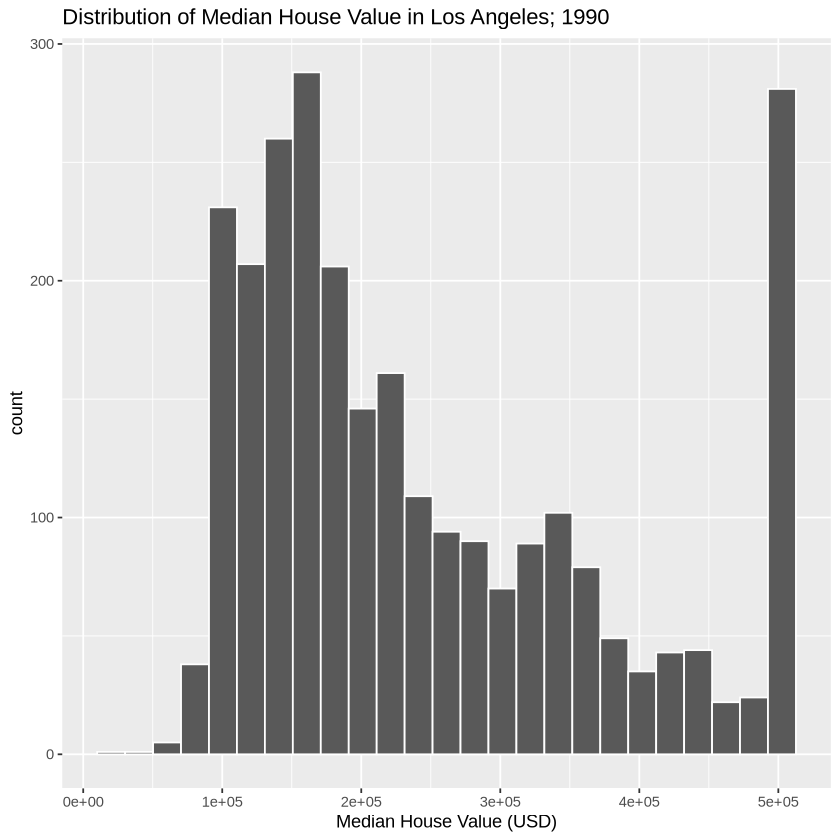

In [6]:
# Plot distribution of samples from la_homes
la_homes_dist <- la_homes %>%
    ggplot(aes(x = Median_House_Value)) + 
        geom_histogram(bins = 25, color = 'white') +
        labs(title = "Distribution of Median House Value in Los Angeles; 1990") +
        xlab("Median House Value (USD)")

la_homes_dist

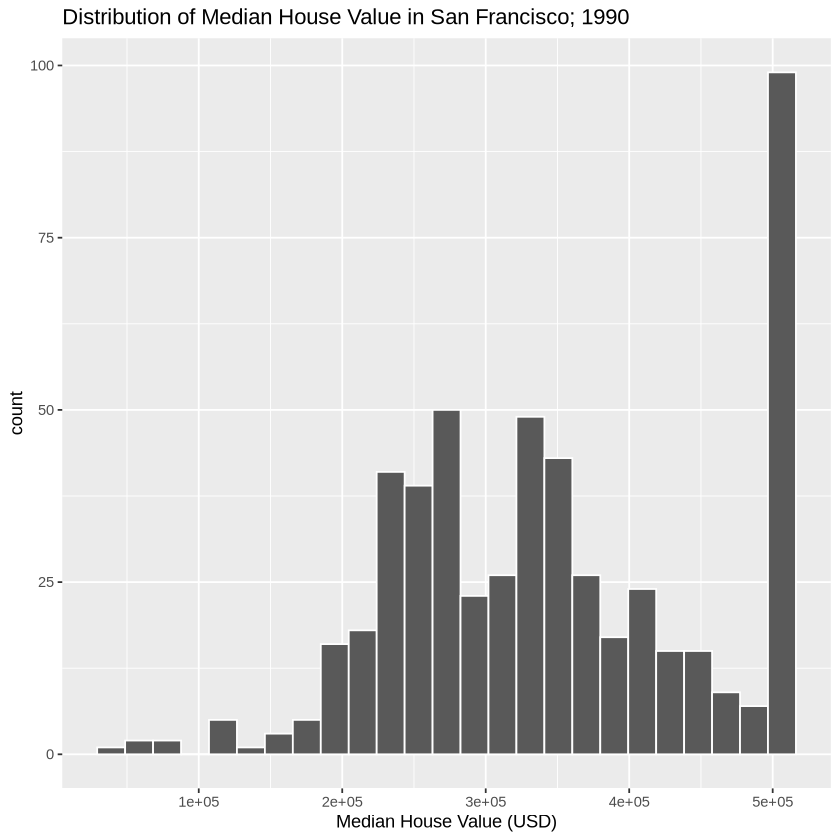

In [7]:
# Plot distribution of sample from sf_homes
sf_homes_dist <- sf_homes %>%
    ggplot(aes(x = Median_House_Value)) + 
        geom_histogram(bins = 25, color = 'white') +
        labs(title = "Distribution of Median House Value in San Francisco; 1990") +
        xlab("Median House Value (USD)")

sf_homes_dist

To conclude the explanatory data analysis we've included more summary statistics of the sample sets. Notice that the *Max House Price* for both Los Angeles and San Francisco are equal which shows that the original data set has a cap on these values. In order to properly compare these two cities we'll need to further filter our sample sets to not include these values. 

|City |Average House Price|Min House Price|Max House Price|Median House Price|
|-----|:-----------------:|:-------------:|:-------------:|:----------------:|
|San Francisco |344885    |32500          |500001         |335100            |
|Los Angeles   |246328    |17500          |500001         |205000            |
<div style="text-align: center"> <h5>Table 1: Summary Statistics for San Francisco and Los Angeles</h5></div>

Notice the large amount of observations found just above 500,000. This is because the dataset reports all values greater than 500,000 as 500,001. So, we decided to only include the houses that are 500,000 or less.

In [8]:
# Further filter the sample sets to only include median house values that are less than 500001
la_homes <- la_homes %>%
    filter(Median_House_Value < 500001)

sf_homes <- sf_homes %>%
    filter(Median_House_Value < 500001)

When we plot the two distributions now:

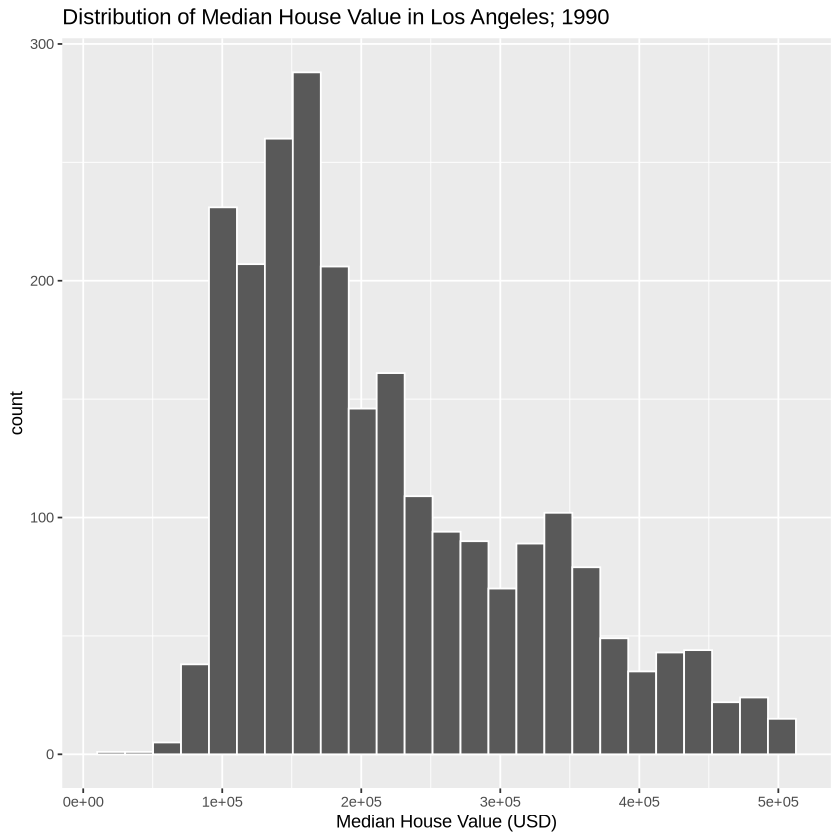

In [9]:
la_homes_dist <- la_homes %>%
    ggplot(aes(x = Median_House_Value)) + 
        geom_histogram(bins = 25, color = 'white') +
        labs(title = "Distribution of Median House Value in Los Angeles; 1990") +
        xlab("Median House Value (USD)")

la_homes_dist

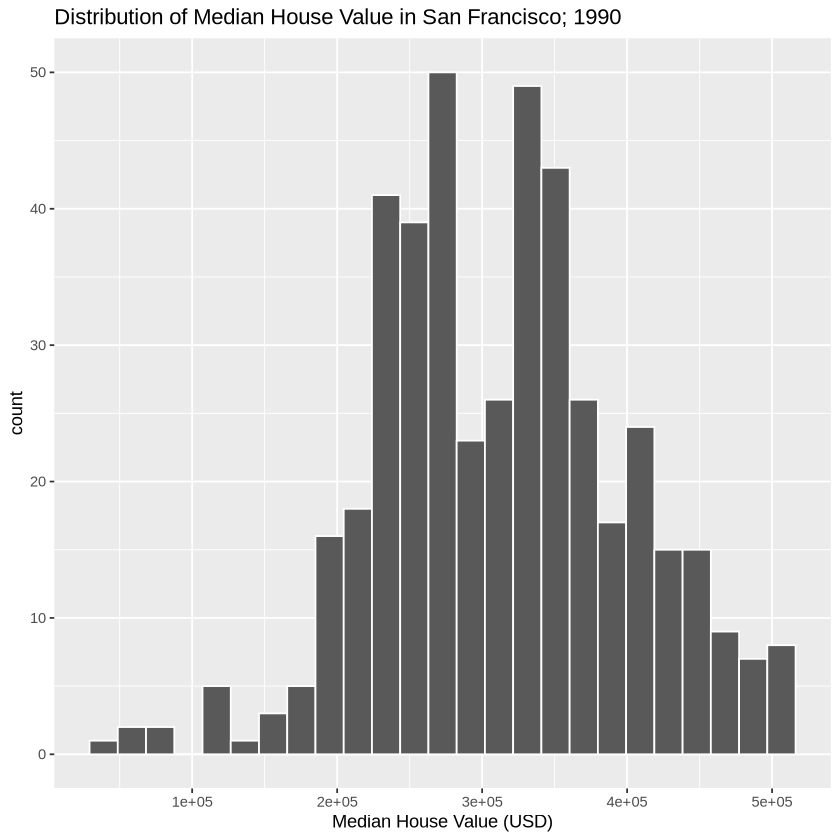

In [10]:
#Plot distribution of sample from sf_homes
sf_homes_dist <- sf_homes %>%
    ggplot(aes(x = Median_House_Value)) + 
        geom_histogram(bins = 25, color = 'white') +
        labs(title = "Distribution of Median House Value in San Francisco; 1990") +
        xlab("Median House Value (USD)")

sf_homes_dist

We can now calculate the mean of the median house values and standard deviation for both Los Angeles and San Francisco after removing the houses with values of 500,001.

In [11]:
# Recalculate the average house value from the newly filtered sample sets
la_homes_mean <- mean(la_homes$Median_House_Value)
la_homes_sample_sd <- sd(la_homes$Median_House_Value)
sf_homes_mean <- mean(sf_homes$Median_House_Value)
sf_homes_sample_sd <- sd(sf_homes$Median_House_Value)

la_homes_mean
la_homes_sample_sd
nrow(la_homes)
sf_homes_mean
sf_homes_sample_sd
nrow(sf_homes)

[1] 218317.1

[1] 101405.4

[1] 2409

[1] 313164.9

[1] 85907.79

[1] 445

We have summarized the sample statistics in the table below:

|City |Previous Mean of the Median House Value|New Mean of the Median House Value|Sample Standard Deviation ($s$)|Sample size ($n$)|
|-----|:-------------------------------------:|:--------------------------------:|:-----------------------------:|:---------------:|
|San Francisco |344885.244402985              |313164.943820225                  |85907.7880496039               |445              |
|Los Angeles   |246327.501308411              |218317.061021171                  |101405.430611342               |2409             |
<div style="text-align: center"> <h5>Table 2: Sample Summary Statistics for San Francisco and Los Angeles</h5></div>

#### Limitation of Preliminary Results
In our analysis, we chose the variable Median_House_Value, which denotes the median house value within a block, to represent the house price in a certain block. In our preliminary findings, we observed that the average house price in San Francisco is higher than Los Angeles. However, solely presenting population parameters in statistical research fails to convey the uncertainty and potential error in estimates. Besides, without confidence intervals, effect sizes, and hypothesis testing outcomes, stakeholders lack a full understanding of the data's reliability and applicability, which is essential for making informed decisions.

### Hypothesis Testing

#### Our first method of hypothesis testing is a two sample t-test based on the Central Limit Theorem. 
We use the Central Limit Theorem to estimate the difference in means for the San Francisco median house value and Los Angeles median house value by calculating the 95% confidence interval using a 0.05 significance level

$\mu_1$ = Mean Value for San Francisco median house price  
$\mu_2$ = Mean Value for Los Angeles median house price  
$\alpha$ = 0.05

##### Formulate Hypotheses:
$H_0$: $\mu_1$ - $\mu_2$ = 0  
$H_A$: $\mu_1$ - $\mu_2$ > 0


##### Calculate Two-Sample $t$-test for Two Independent Samples:
$t_0$ = $\frac{\bar{x_1} - \bar{x_2} - \Delta_0}{\sqrt{\frac{s^{2}_{1}}{n_1} + \frac{s^{2}_{2}}{n_2}}}$  

##### Draw smaller sample sets for San Francisco & Los Angeles (n= 40)

In [12]:
# New dataset for Los Angeles that contains 40 randomly selected values
set.seed(123)
la_house_sample <- la_homes |>
        select(Median_House_Value) |>
        rep_sample_n(size = 40, replace = F)

# New dataset for San Francisco that contains 40 randomly selected values
sf_house_sample <- sf_homes |>
        select(Median_House_Value) |>
        rep_sample_n(size = 40, replace = F)

# Calculate summary statistics for the two new datasets
x2 <- mean(la_house_sample$Median_House_Value)
s2 <- sd(la_house_sample$Median_House_Value)
x1 <- mean(sf_house_sample$Median_House_Value)
s1 <- sd(sf_house_sample$Median_House_Value)
n1 <- nrow(la_house_sample)
n2 <- nrow(sf_house_sample)

cali_house_summary <- 
        tibble(
          x2,
            x1,
            s1,
            s2,
            n1,
            n2
            )

head(la_house_sample)
head(sf_house_sample)
cali_house_summary

replicate Median_House_Value
1 1         177200            
2 1         210000            
3 1         213100            
4 1         123800            
5 1         266700            
6 1         102300

replicate Median_House_Value
1 1         189000            
2 1         331000            
3 1         323100            
4 1         380400            
5 1         381700            
6 1         390000

x2       x1       s1       s2       n1 n2
1 190302.5 330787.5 84837.69 109431.2 40 40

|City          |Mean of the Median House Value|Sample Standard Deviation ($s$)|Sample size ($n$)|
|--------------|:----------------------------:|:-----------------------------:|:---------------:|
|San Francisco |330787.5                      |84837.69                       |40               |
|Los Angeles   |109302.5                      |109431.2                       |40               |
<div style="text-align: center"> <h5>Table 3: Sample statistics for San Francisco and Los Angeles; Sample Size 40</h5></div>

In [13]:
# Calculate the Two-Sample t-test for Two Independent Samples

delta_0 <- 0

t_0 <- (x1 - x2 - delta_0)/sqrt((s1^2/n1) + (s2^2/n2))

t_0

[1] 6.416812

##### The Null Model follows a t-distribution with v degrees of freedom:  
$$
\nu = \frac{
    \left(\frac{s_{1}^2}{n_1}+\frac{s_{2}^2}{n_2}\right)^2
}
{
\frac{s_{1}^4}{n_1^2(n_1-1)}+\frac{s_{2}^4}{n_2^2(n_2-1)}
}
$$

##### Calculate the p-value using the right-tailed area:
pt(t_0, df, lower.tail = F)

In [14]:
# Calculate the p-value to compare against the significance level
v = ((s1^2)/n1 + (s2^2)/n2)^2/(s1^4/((n1^2)*(n1-1)) + s2^4/((n2^2)*(n2-1)))

p_value = pt(t_0, v, lower.tail = FALSE)

v
p_value

[1] 73.43949

[1] 6.035004e-09

In [15]:
# Calculate the p-value using t.test function to compare against the significance level
house_value_summary <-
    tidy(
        t.test(x = sf_house_sample$Median_House_Value,
               y = la_house_sample$Median_House_Value,
               alternative = "greater")
        )
house_value_summary

estimate estimate1 estimate2 statistic p.value      parameter conf.low
1 140485   330787.5  190302.5  6.416812  6.035004e-09 73.43949  104013.7
  conf.high method                  alternative
1 Inf       Welch Two Sample t-test greater

As seen above, our p-value is very small (6.035e-09) and is less than our significance level of 0.05. Therefore, at a significance level of 0.05, we reject the null hypothesis. Instead, we can say we have sufficient evidence to support our alternative hypothesis, that the mean value for San Francisco median house price is greater than the mean value for Los Angeles median house price. The difference is statistically significant and can not to be neglected.

##### Calculate the confidence interval based on Central Limit Theorem to estimate the difference in mean 
To further validate our hypothesis test result, we also use the Central Limit Theorem to calculate the 95% confidence interval to estimate the difference in means for the Los Angeles median house value and San Francisco median house value. This also corresponds to the 0.05 significant level we used above.

In [16]:
# Calculate a 95% confidence interval to estimate the difference in means between the two cities
house_value_diff_means_ci <- 
    tibble(
        lower_ci = x1 - x2 - qnorm(0.975) * sqrt(s1^2/n1 + s2^2/n2),
        upper_ci = x1 - x2 + qnorm(0.975) * sqrt(s1^2/n1 + s2^2/n2)
    )

house_value_diff_means_ci

lower_ci upper_ci
1 97574.98 183395

Based on the 95% confidence interval the 0 value is not included . This provides us with evidence that we're 95% confident that the true difference in mean (x1-x2) is not 0, and is actually somewhere between 97574.98 and 183395. 

As a result, we reject null hypothesis and conclude the the mean value of houses in San Francisco in greater than Los Angeles on a 0.05 significant level. Meanwhile, we commit to Type I Error with a probability of 5%


#### For our second method, we will use hypothesis test based on bootstrapping to estimate the difference in means.

Although we have already conducted a hypothesis test based on the Central Limit Theorem, we hope to use the bootstrapping method to double-check our results to explore whether our conclusions change under different research methodologies.

In [17]:
# Resample the LA houses & SF houses with size n = 40
set.seed(80)
sf_la_house_sample <- la_homes |>
            select(Median_House_Value) |>
            mutate(City = "LA") |>
            sample_n(size = 40) |>
            bind_rows(
                sf_homes |>
                select(Median_House_Value) |>
                mutate(City = "SF") |>
                sample_n(size= 40)
                )


head(sf_la_house_sample)

Median_House_Value City
1 154200             LA  
2 332500             LA  
3 270000             LA  
4 397500             LA  
5 226700             LA  
6 171300             LA

In [18]:
# Visualization

house_sample_boxplots <-
    sf_la_house_sample%>% 
    ggplot() +
    geom_boxplot(aes(x = City, y = Median_House_Value, fill = City)) +
    theme(text = element_text(size = 16)) +
    ggtitle("House Value Boxplot") + 
    xlab("City") + 
    ylab("House Value") 

house_sample_boxplots

In [19]:
# Find the observed difference in mean for the sample

obs_mean_diff <- 
    sf_la_house_sample %>% 
    filter(City %in% c("LA", "SF")) %>%
    group_by(City) %>% 
    summarise(mean = mean(Median_House_Value	)) %>%
    pivot_wider(names_from = City, values_from = mean) %>%
    transmute(diff = SF - LA) %>%
    pull(diff)
obs_mean_diff

[1] 104990

We find that the observed difference in means of median house prices (San Francisco - Los Angeles) is 104,990. 

In [20]:
# Null Distribution based on bootstrapping (5000 reps)

set.seed(5000)

null_model_house <- 
   sf_la_house_sample %>% 
   specify(formula = Median_House_Value ~ City ) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 5000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("SF", "LA"))

head(null_model_house)

replicate stat  
1 1         -46800
2 2         -40725
3 3          53330
4 4          22275
5 5         -12540
6 6            310

In [21]:
# Visualize the Null Model of Hypothesis Test and Get the P_value

house_result_plot <- 
   null_model_house %>%
   visualize() + 
    xlab("Diff in mean") +
   shade_p_value(obs_stat = obs_mean_diff , direction = "right")

p_value_2 <- null_model_house |>
        get_p_value(obs_stat = obs_mean_diff, direction = "greater")


house_result_plot
p_value_2

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”
Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


p_value
1 0

As we can see from the figure above, the null distribution does not overlap with out observed mean in median house prices (104,990).  Meanwhile, the p_value we calculate from the null model is 0, or maybe is very close to 0. Therefore, we reject the null hypothesis in favour of the alternative hypothesis that the mean in median house prices of San Francisco is greater than that of Los Angeles.

##### Why Trustworthy？
Our original dataset represents median house prices across California districts, sourced from the 1990 census, which is quality and dependable.
As the original data does not classify these observations into distinct cities, we distinguish between Los Angeles and San Francisco by using ‘longitude’ and ‘latitude’ coordinates based on the approximate boundaries of these two cities.  

The dataset contains 20,640 observations, which is a substantial sample size that guarantees the robustness of our analysis, eliminating concerns about potential invalidity due to a limited number of data points. Additionally, since the estimator we are studying is the difference in means, which falls under the category of the sum of variables. Moveover, we have also observed in our preliminary results that the housing values in the two regions are approximately normally distributed. Thus, the Central Limit Theorem (CLT) is applicable in this research.



##### Reflection:
We expected to find that the median house price for all blocks in the San Francisco area is greater than in Los Angeles, which is reflected in our alternative hypothesis.
Findings concerning the difference in average housing prices between San Francisco and Los Angeles can have many impacts. For example, homebuyers and investors may consider the findings when deciding where to purchase properties in these two popular cities. Additionally, the findings of this report can be used to investigate economic disparities between the two cities, as housing is a leading economic indicator.
Future questions that may arise from this report will be dependent on the findings. If one city has a significantly higher average housing price, it would be natural to ask questions about the long-term trend in price difference between the cities and the causes of this price difference.

##### Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

In our analysis, both methods were used to test the hypothesis that the mean median house price in San Francisco is greater than that in Los Angeles. The results from both methods were consistent and led to the rejection of the null hypothesis, indicating a statistically significant difference in median house prices between the two cities.

The similarity in results from both methods adds robustness to the findings. However, the trustworthiness of each method can vary based on specific conditions. In this case, since our dataset seems to have a substantial number of observations (20,640), the asymptotic method (t-test) is typically more reliable due to the central limit theorem. 

## Discussion

Our analysis revealed a significant difference in housing prices between San Francisco and Los Angeles, with San Francisco exhibiting higher average median house prices than Los Angeles. This difference was statistically significant, as evidenced by the results of both the t-test and bootstrapping methods. The histograms and IQR values further highlighted that San Francisco not only had higher median house values but also a wider spread in housing prices, indicating greater variability in its housing market. This result is expected because other research studies have also found that median house price in San Francisco is significantly higher than in Los Angeles.


##### Future questions that this study can leads to invloves
1. Investigating the correlation between household incomes and housing prices in San Francisco and Los Angeles. This study would focus on understanding whether the higher housing prices in San Francisco align with correspondingly higher household incomes compared to Los Angeles. 
2. Examining how the disparity in housing prices has evolved over time, especially given recent economic changes and housing market dynamics, could provide deeper insights into long-term trends.
3. Extending this analysis to other major cities in California or across the United States could highlight regional differences and trends in housing markets.

In conclusion, this study opens up various avenues for future research, providing a foundational understanding of the housing price disparities between San Francisco and Los Angeles while highlighting the need for further exploration into the causes and broader implications of these findings.

## References

Glaeser, E., & Gyourko, J. (n.d.). The economic implications of Housing Supply. Journal of Economic Perspectives. https://www.aeaweb.org/articles?id=10.1257%2Fjep.32.1.3

Hipp, J. R., & Singh, A. (2014). Changing neighborhood determinants of housing price trends in Southern California, 1960–2009. City & Community, 13(3), 254–274. https://doi.org/10.1111/cico.12071